In [4]:
#!git clone https://github.com/HiroshiKERA/monomial-agnostic-vanishing-ideal.git

In [5]:
# import os
# path = '/content/monomial-agnostic-vanishing-ideal/'

# os.chdir(path)
# !ls
# !pip install diophantine

In [6]:
import sys
sys.path.append('..')
# sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal

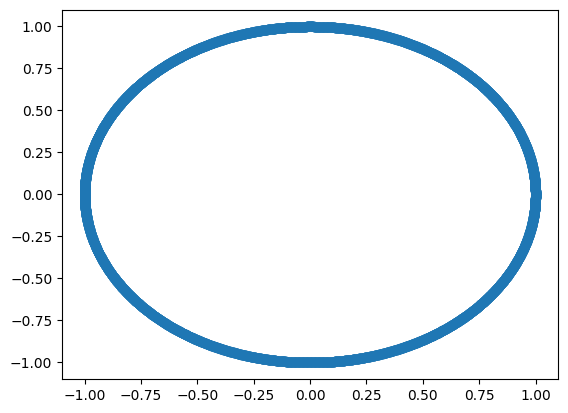

In [11]:
npts = 3890
theta = [np.pi*i/(npts/2) for i in range(npts)]
X = np.vstack((np.cos(theta), np.sin(theta))).T
plt.plot(X[:,0], X[:,1], "o")

In [12]:
vi = VanishingIdeal()
# vi.fit(X, 0.01, method="grad")
# vi.fit(X, 0.01, method="grad", max_degree=3)
vi.fit(X, 0.01, method="grad", max_degree=2)
# vi.fit(data, 0.01, method="grad", max_degree=2)
vi.basis[0]

In [14]:
import sympy as sp
from sympy.abc import x, y, z, w, u
X_symb = np.array([[x, y]])
# X_symb = np.array([[x, y, z, w]])
# all_symbs = [x, y, z, w, u][:data.shape[1]]
# X_symb = np.array([[x, y, z, w, u][0:data.shape[1]]])

G = vi.evaluate(X_symb, target='vanishing')  # (1, 6) array
G = np.ravel(G)
# print(type(G[0]))
# vi.plot(X, splitshow=True)
G

array([-7.11162965870929e-17*x - 1.06359771001936e-16*y - 1.16660177431213e-16*(0.999999500000375*x + 9.79034286752396e-17)*(0.999999500000375*y + 2.20313073379942e-18) + 0.499999791666797*(x + 9.79034776269417e-17)**2 + 0.499999791666797*(y + 2.20313183536451e-18)**2 - 0.499999791666797],
      dtype=object)

In [15]:
from IPython.display import display
for i, g in enumerate(G):
    print(f'vanishing polynomial #{i}')
    # display(g)
    g = sp.expand(g)
    display(g)
    # print(g)
    print('')

vanishing polynomial #0


0.499999791666797*x**2 - 1.16660060771153e-16*x*y + 2.67871402467586e-17*x + 0.499999791666797*y**2 - 1.04156640084542e-16*y - 0.499999791666797

In [81]:
def round_expr(expr, num_digits):  # author: https://stackoverflow.com/a/48491897
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

def simpl_disp(expr):
    smds = sp.Add.make_args(expr)
    # display(smds)
    # li[0] < 1e-10
    li = [sp.Mul.make_args(smd)[0] for smd in smds]
    # display(li)
    # li = [(abs(smd) > 1e-10) for smd in li]
    li = [smds[i] for i, smd in enumerate(li) if (abs(smd) > 1e-10)]
    # li = [smd for smd in li ]
# li = [f'{smd:e}' for smd in li]
    expr = sum([round_expr(smd, 3) for smd in li]) 
    eq = sp.Eq(expr, 0)
    # display(li)
    # display(expr)
    # display(eq)
    return eq, expr

display(simpl_disp(g)[0])

Eq(0.5*x**2 + 0.5*y**2 - 0.5, 0)